# Anomaly Based Network Intrution Detection Module based on Long Short Term Memory Algorithm

Welcome to my notebook on Anomaly Based Network Intrusion Detection Module using Long Short Term Memory (LSTM) Algorithm and the CSE-CIC-IDS 2018 (02-20-2018) dataset. In today's world where the majority of the operations have moved online, ensuring the security of networks is of utmost importance. In order to detect any potential malicious activity or cyber attack on a network, intrusion detection systems (IDS) are used. Traditional rule-based IDS rely on a set of pre-defined rules and signatures to identify attacks, but they are not effective against new or unknown attacks.

To address this limitation, I am using an anomaly-based approach that leverages the power of LSTM algorithm, which is a type of deep learning algorithm that can capture and learn complex patterns in sequential data. The CSE-CIC-IDS 2018 dataset contains a large amount of network traffic data that we can use to train and evaluate our model. My goal with this notebook is to demonstrate how LSTM algorithm can be used for effective network intrusion detection, and to provide a step-by-step guide for implementing this approach using Python and popular deep learning libraries such as TensorFlow and Keras. So, let's get started and build a robust and accurate network intrusion detection system using deep learning techniques!

# Import necessary modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD

# Import dataset 

The CSE-CIC-IDS 2018 dataset is a collection of over 2.8 million network traffic records created by the Canadian Institute for Cybersecurity. It contains both normal and malicious traffic, including ten different types of network attacks. This dataset is used to train and test intrusion detection systems and machine learning models to detect network attacks.


To download the CSE-CIC-IDS 2018 dataset use this link: https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv

I am using the 02-20-2018.csv file for this project as data_4.csv.

In [3]:
df = pd.read_csv("data_4.csv") #CSE-CIC-IDS 2018 (02-20-2018)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [4]:
print(df.head())
print(df['Label'].value_counts())

                                  Flow ID          Src IP  Src Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172     45498   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   

         Dst IP  Dst Port  Protocol            Timestamp  Flow Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            11            11  ...       

# Data Cleaning

## Replace space with "_"
In order to avoid future conflicts, we need to replace spaces with underscores.

In [5]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

                                  Flow_ID          Src_IP  Src_Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172     45498   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   

         Dst_IP  Dst_Port  Protocol            Timestamp  Flow_Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0            11            11  ...       

## Checking for null and INFINITE

In [6]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

#drop null
df.dropna(how = 'all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


## Checking Data type

In [7]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948748 entries, 0 to 7948747
Data columns (total 82 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow_ID            object 
 1   Src_IP             object 
 2   Src_Port           int64  
 3   Dst_IP             object 
 4   Dst_Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow_Duration      int64  
 8   Tot_Fwd_Pkts       int64  
 9   Tot_Bwd_Pkts       int64  
 10  TotLen_Fwd_Pkts    float64
 11  TotLen_Bwd_Pkts    float64
 12  Fwd_Pkt_Len_Max    float64
 13  Fwd_Pkt_Len_Min    float64
 14  Fwd_Pkt_Len_Mean   float64
 15  Fwd_Pkt_Len_Std    float64
 16  Bwd_Pkt_Len_Max    float64
 17  Bwd_Pkt_Len_Min    float64
 18  Bwd_Pkt_Len_Mean   float64
 19  Bwd_Pkt_Len_Std    float64
 20  Flow_IAT_Mean      float64
 21  Flow_IAT_Std       float64
 22  Flow_IAT_Max       float64
 23  Flow_IAT_Min       float64
 24  Fwd_IAT_To

## Drop all column contain object datatype exept Label
Drop Timestamp, Flow_id, Src_ip and Dst_ip columns as they contain object datatype and will not be usefull in traning model. 

In [8]:
df = df.drop(columns=['Timestamp', 'Flow_ID', 'Src_IP', 'Dst_IP'])
print('Timestamp, ', 'Flow_ID, ', 'Src_IP, ', 'Dst_IP, ', "columns are dropped")

Timestamp,  Flow_ID,  Src_IP,  Dst_IP,  columns are dropped


## Modify Label column
Label column consists of the main values which defines waether the data in the raw discribe attach or not. In order to convert from object to numaric, first look in to data exists in the column.

In [9]:
print(df['Label'].value_counts())

Benign                    7372557
DDoS attacks-LOIC-HTTP     576191
Name: Label, dtype: int64


As we can see there are only two values present. Now we can use binary method to catogaries the data as below.
<br>benign --> 0
<br>DDoS attacks --> 1

In [10]:
df.Label[df.Label=='Benign'] = 0
df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1
df["Label"].astype('Int64')
print(df['Label'].value_counts())

C:\Users\sahan\AppData\Local\Temp\ipykernel_16504\2512802206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label=='Benign'] = 0
C:\Users\sahan\AppData\Local\Temp\ipykernel_16504\2512802206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1


0    7372557
1     576191
Name: Label, dtype: int64


## Reduce Bening rows
Through reducing the number of bening rows, we can increse the percentage of traning and testing data in both data versions.

In [11]:
# Count the number of rows in each class
ddos_count = df[df['Label'] == 1].shape[0]
benign_count = df[df['Label'] == 0].shape[0]

# Randomly sample the benign rows to reduce their count
df_benign = df[df['Label'] == 0].sample(n=ddos_count, random_state=42)

# Combine the DDoS and sampled benign rows into a new dataframe
df_reduced = pd.concat([df[df['Label'] == 1], df_benign])

# Shuffle the rows in the new dataframe
df_reduced = df_reduced.sample(frac=1, random_state=42)

df = df_reduced
df["Label"].astype('float')
print(df['Label'].value_counts())

0    576191
1    576191
Name: Label, dtype: int64


# Date Analysis

The code is creating a scatter plot with 'Flow_Duration' on the x-axis and 'Tot_Fwd_Pkts' on the y-axis. It is comparing the distribution of these two variables between the 'benign' and 'malignant' classes.

The scatter plot shows that most of the 'malignant' flows have a 'Tot_Fwd_Pkts' value between 0 to 250000 and 'Flow_Duration' between 0 to 1.2 seconds. On the other hand, most of the 'benign' flows have a much smaller 'Tot_Fwd_Pkts' value, less than 1000, within the same time period. This indicates that there is a clear difference between the 'malignant' and 'benign' classes in terms of the number of forwarded packets during the flow duration.

A Support Vector Machine (SVM) model trained on this dataset could be used for binary classification to classify a network traffic flow as either benign or malicious based on the available features. Given the scatter plot, we can see that there is a clear separation between the benign and malicious flows, which could potentially lead to good classification performance by an SVM model. However, it's important to note that this dataset may not represent all possible network traffic scenarios, and there may be additional data preprocessing and feature engineering steps required to achieve optimal performance from the SVM model.

In [12]:
bening_df = df[df['Label']==0]
malignant_df = df[df['Label']==1]

<Axes: xlabel='Flow_Duration', ylabel='Tot_Fwd_Pkts'>

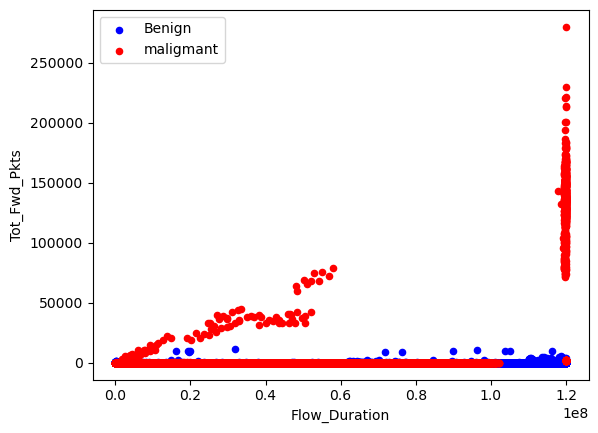

In [13]:
axes = bening_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='red', label='maligmant', ax=axes)

## Converting categorical variables to integers

In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

print('Data type of each column of Dataframe :')
df.info(verbose=True)

Index(['Label'], dtype='object')
Index(['Label'], dtype='object')
Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152382 entries, 2125399 to 122045
Data columns (total 78 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Src_Port           1152382 non-null  int64  
 1   Dst_Port           1152382 non-null  int64  
 2   Protocol           1152382 non-null  int64  
 3   Flow_Duration      1152382 non-null  int64  
 4   Tot_Fwd_Pkts       1152382 non-null  int64  
 5   Tot_Bwd_Pkts       1152382 non-null  int64  
 6   TotLen_Fwd_Pkts    1152382 non-null  float64
 7   TotLen_Bwd_Pkts    1152382 non-null  float64
 8   Fwd_Pkt_Len_Max    1152382 non-null  float64
 9   Fwd_Pkt_Len_Min    1152382 non-null  float64
 10  Fwd_Pkt_Len_Mean   1152382 non-null  float64
 11  Fwd_Pkt_Len_Std    1152382 non-null  float64
 12  Bwd_Pkt_Len_Max    1152382 non-null  float64
 13  Bwd_Pkt_Len_Min    11

# Creating Traning and Testing arrays

This step is creating a numpy array of the selected independent variables from the training dataset, which will be used to train the SVM model. The purpose of creating a numpy array is to ensure that the data is in a format that can be efficiently processed by the machine learning algorithm. The numpy array created here will have 15,000 rows (since we selected 15,000 rows from the original dataset) and 79 columns (since we selected 79 columns from the original dataset as features).

## Creating train_df dataset

In [15]:
# Shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Select a subset of the data for training
num_data = 15000 # can change between 500 and 1152382
train_df = df.iloc[:num_data].copy() # Use .iloc to avoid a SettingWithCopyWarning


print('Data type of each column of Dataframe :')
train_df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Src_Port           15000 non-null  int64  
 1   Dst_Port           15000 non-null  int64  
 2   Protocol           15000 non-null  int64  
 3   Flow_Duration      15000 non-null  int64  
 4   Tot_Fwd_Pkts       15000 non-null  int64  
 5   Tot_Bwd_Pkts       15000 non-null  int64  
 6   TotLen_Fwd_Pkts    15000 non-null  float64
 7   TotLen_Bwd_Pkts    15000 non-null  float64
 8   Fwd_Pkt_Len_Max    15000 non-null  float64
 9   Fwd_Pkt_Len_Min    15000 non-null  float64
 10  Fwd_Pkt_Len_Mean   15000 non-null  float64
 11  Fwd_Pkt_Len_Std    15000 non-null  float64
 12  Bwd_Pkt_Len_Max    15000 non-null  float64
 13  Bwd_Pkt_Len_Min    15000 non-null  float64
 14  Bwd_Pkt_Len_Mean   15000 non-null  float64
 15  Bwd_Pkt_Len_Std    15000 non-n

# Split dataset

In [16]:
train_size = int(0.7 * len(train_df))
val_size = int(0.15 * len(train_df))
test_size = len(train_df) - train_size - val_size
train_data = train_df.iloc[:train_size, :]
val_data = train_df.iloc[train_size:train_size+val_size, :]
test_data = train_df.iloc[train_size+val_size:, :]

# Generate sequences

In [17]:
# Define sequence length and overlap
seq_length = 10 # Sequence length
seq_overlap = 5 # Overlap between sequences

# Function to generate sequences
def generate_sequences(data):
    seqs = []
    for i in range(0, len(data) - seq_length + 1, seq_overlap):
        seqs.append(data.iloc[i:i+seq_length, :])
    return seqs

# Generate sequences for train, validation, and test sets
train_seqs = generate_sequences(train_data)
val_seqs = generate_sequences(val_data)
test_seqs = generate_sequences(test_data)

# pad sequences

In [18]:
# Function to pad sequences
def pad_sequences(seqs):
    padded_seqs = []
    for seq in seqs:
        if len(seq) < seq_length:
            padded_seq = np.concatenate((seq, np.zeros((seq_length-len(seq), len(df.columns)))), axis=0)
        else:
            padded_seq = seq
        padded_seqs.append(padded_seq)
    return np.array(padded_seqs)

# Pad sequences for train, validation, and test sets
train_seqs = pad_sequences(train_seqs)
val_seqs = pad_sequences(val_seqs)
test_seqs = pad_sequences(test_seqs)

# Reshape input

In [19]:
# Reshape input
train_X = np.reshape(train_seqs, (train_seqs.shape[0], train_seqs.shape[1], len(train_df.columns)))
val_X = np.reshape(val_seqs, (val_seqs.shape[0], val_seqs.shape[1], len(train_df.columns)))
test_X = np.reshape(test_seqs, (test_seqs.shape[0], test_seqs.shape[1], len(train_df.columns)))

# Normalize data

In [20]:
# Normalize data
train_X = (train_X - train_X.mean()) / train_X.std()
val_X = (val_X - train_X.mean()) / train_X.std()
test_X = (test_X - train_X.mean()) / train_X.std()

# Convert labels to categorical

In [21]:
# Convert labels to categorical
train_y = to_categorical(train_data["Label"].values[:train_X.shape[0]])
val_y = to_categorical(val_data["Label"].values[:val_X.shape[0]])
test_y = to_categorical(test_data["Label"].values[:test_X.shape[0]])

In [22]:
train_X = train_X.astype('float32')
train_y = train_y.astype('float32')
val_X = val_X.astype('float32')
val_y = val_y.astype('float32')


# Long Short Term Memory (LSTM)

In [23]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD

In [26]:
seq_length = 10 # set the sequence length
n_features = len(df.columns) # number of features in the dataset

# Define model architecture
from keras.layers import Activation

# Define model architecture with ReLU activation function
model = Sequential()
model.add(LSTM(units=64, input_shape=(seq_length, n_features), return_sequences=True))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(units=2, activation='softmax'))


# Compile model with SGD optimizer
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(train_X.shape, train_y.shape, val_X.shape, val_y.shape)
model.summary()

(2099, 10, 78) (2099, 2) (449, 10, 78) (449, 2)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 64)            36608     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 49,090
Trainable params: 49,090
Non-trainable params: 0
_________________________________________________________________


e:\Anaconda\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(train_X, train_y, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stop])
history

Epoch 1/100
119/119 [==============================] - 5s 12ms/step - loss: 0.6959 - accuracy: 0.5098 - val_loss: 0.7022 - val_accuracy: 0.4762
Epoch 2/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.4923 - val_loss: 0.6925 - val_accuracy: 0.5476
Epoch 3/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6936 - val_accuracy: 0.4762
Epoch 4/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6945 - accuracy: 0.4801 - val_loss: 0.6919 - val_accuracy: 0.5429
Epoch 5/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6923 - val_accuracy: 0.5286
Epoch 6/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.5140 - val_loss: 0.6945 - val_accuracy: 0.4857
Epoch 7/100
119/119 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.5199 - val_loss: 0.6918 - val_accuracy: 0.495

# Results
Below is a the common way to discribe the results of the LSTM model. 

## LOSS Chart

<function matplotlib.pyplot.show(close=None, block=None)>

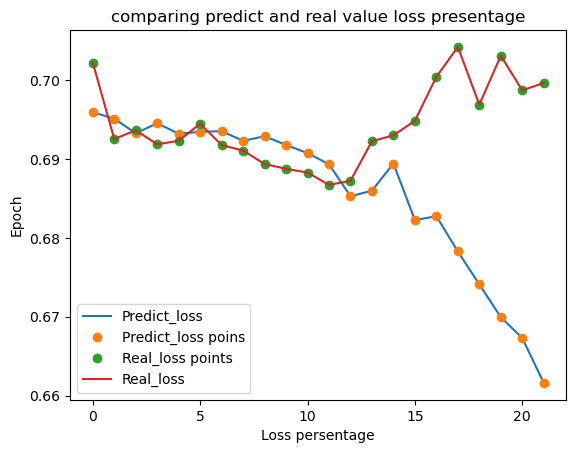

In [30]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['loss'], 'o')
plt.plot(history.history['val_loss'], 'o')
plt.plot(history.history['val_loss'])
plt.title('comparing predict and real value loss presentage')
plt.xlabel('Loss persentage')
plt.ylabel('Epoch')
plt.legend(['Predict_loss','Predict_loss poins','Real_loss points', 'Real_loss'])
plt.show

## Accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

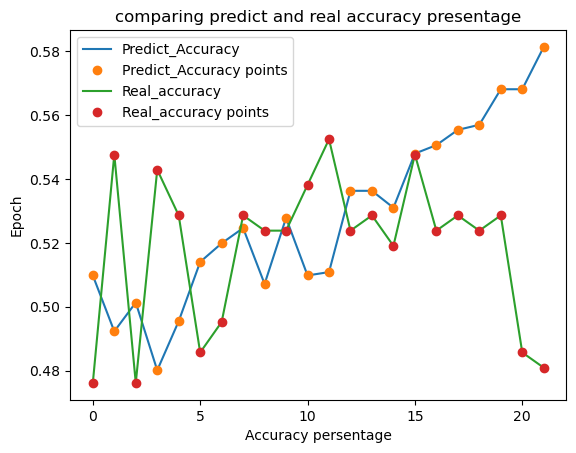

In [31]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('comparing predict and real accuracy presentage')
plt.xlabel('Accuracy persentage')
plt.ylabel('Epoch')
plt.legend(['Predict_Accuracy','Predict_Accuracy points', 'Real_accuracy','Real_accuracy points'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

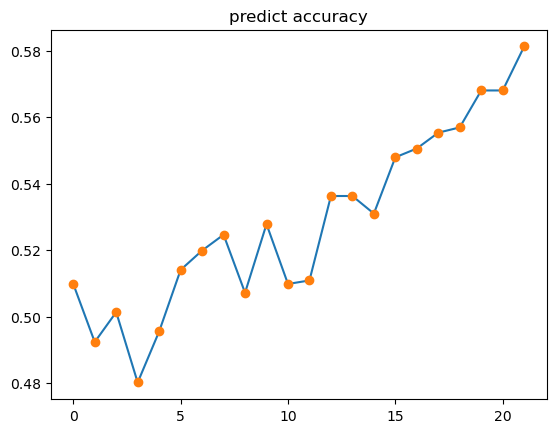

In [32]:
#accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.title('predict accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

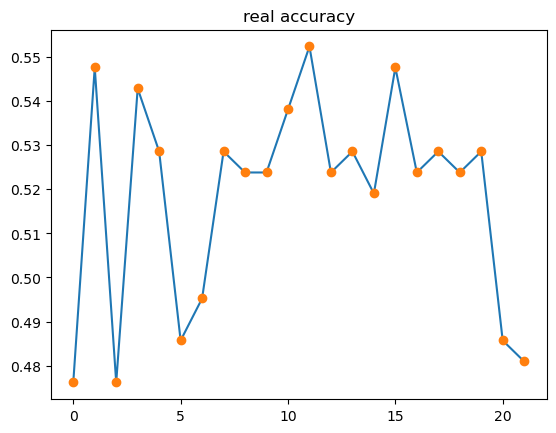

In [33]:
#val_accuracy Plot
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('real accuracy')
plt.show